# Module 2: Data Analysis

## Sprint 1: Introduction to SQL & Statistics Fundamentals

## Part 5: Analysis of the Mental Health in the Tech Industry

## About this Part

Congrats!
You have reached the last Part of this Sprint.
As the final assignment of this Sprint, you will analyse the Mental Health in the Tech Industry Dataset.
You will have to apply all that you have learned about SQL, Statistics, and Data Analysis to complete this task.
Our expectation is that you'll use your own judgement how to perform the analysis and how to select the most important avenues of exploration.
You'll have to iteratively raise hypotheses and use your data analysis skills to get answers.

P.S. we don't expect this project to be perfect - you will continue to improve your skills and there will be many projects for you to apply your newly gained skills in the future.
For now just use what you have learned and try your best!

## Objectives for this Part

- Practice working with SQLite datasets.
- Practice performing EDA.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries and filtering data using SQL and Pandas.

## Requirements

- Download the data from [Mental Health in the Tech Industry](https://www.kaggle.com/anth7310/mental-health-in-the-tech-industry).
- Load the data using SQLite and Pandas.
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface or did you explored the dataset in depth?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structured? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?

## Sample Correction Questions

During a correction, you may get asked questions that test your understanding of covered topics.

## Correction

During your project correction, you should present your project as if talking to a product manager and senior data analyst working in your team.
You will have to find the right balance between explaining the business side and the technical aspects of your work.
You can assume that both of your colleagues have a strong understanding of and are very interested in the business aspect of your project, so be sure to clearly explain what new insights you've found while analyzing the dataset and which directions look the most promising for further research.
However, you should also spend time explaining the technical aspects of your work, especially the more complex or unconventional choices.

During a correction, you may get asked questions that test your understanding of covered topics.

- What are the main types and subtypes of data?
- What are the main metrics of location? What advantages and disadvantages each of them have?
- What is variability? What are the main metrics of variability? What advantages and disadvantages each of them have?
- What is correlation? How do we use it to analyse data?
- What is a contingency table?


## General Correction Guidelines

For an in-depth explanation about how corrections work at Turing College, please read [this doc](https://turingcollege.atlassian.net/wiki/spaces/DLG/pages/537395951/Peer+expert+reviews+corrections).


##Loading Sqlite Data

In [1]:
! gdown --id 1_XtrYSMuzZ-KWW6Y17IXA3qXHDBuGRhj

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_XtrYSMuzZ-KWW6Y17IXA3qXHDBuGRhj
To: /content/mental_health.sqlite
100% 5.89M/5.89M [00:00<00:00, 213MB/s]


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="In a future version")
from geopy.geocoders import Nominatim
import folium
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Disable line wrapping

In [3]:
sql_data = sqlite3.connect('/content/mental_health.sqlite')

In [4]:
query_Survey = "SELECT * FROM Survey"
df_survey = pd.read_sql_query(query_Survey, sql_data)
df_survey.head()

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [5]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Disable line wrapping

query_Question = "SELECT * FROM Question"
df_Question = pd.read_sql_query(query_Question, sql_data)
df_Question.head()

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5


In [6]:
query_answer = "SELECT * FROM Answer ORDER BY UserID"
df_Answer = pd.read_sql_query(query_answer, sql_data)
df_Answer.head()

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,Female,2014,1,2
2,United States,2014,1,3
3,Illinois,2014,1,4
4,-1,2014,1,5


**Analysing the Survey**

Text(0, 0.5, 'The No. of times a Question ID asked')

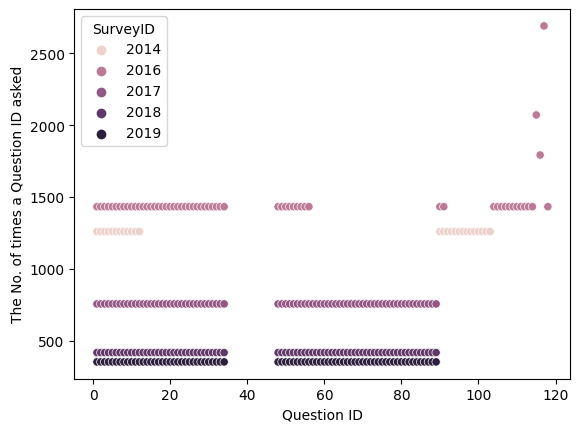

In [29]:
group_with_year_qustionID = df_Answer.groupby(['SurveyID','QuestionID']).size().reset_index()

ax00=sns.scatterplot(x='QuestionID', y= 0,hue= 'SurveyID', data=group_with_year_qustionID)

ax00.set_xlabel('Question ID')
ax00.set_ylabel('The No. of times a Question ID asked')

Text(0, 0.5, 'Survey Question')

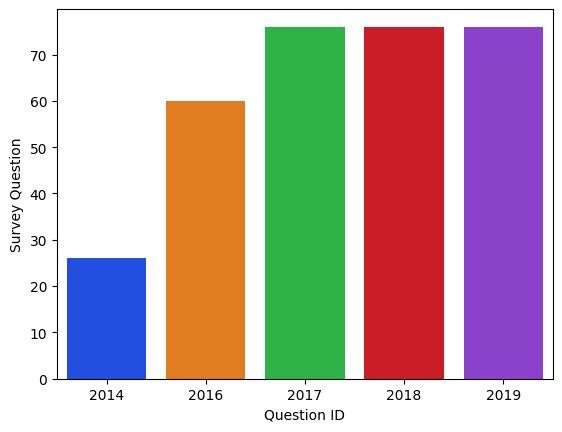

In [34]:
ax01=sns.countplot(x='SurveyID', data=group_with_year_qustionID)
ax01.set_xlabel('Question ID')
ax01.set_ylabel('Survey Question')

From the above analysis, it can be seen the number of questions in each survey  from 2017 to 2019 was the same. However, when it comes to 2014 and 2016, the number of question was 26 and 60 respectively.

###Question Grouping

After thorough examination of the questions, I have found it easier to organize them to the following group:

* Group 1: General Information
  *	What is your age? (1)
  *	What is your gender? (2)
  *	What country do you live in? (3)
  *	If you live in the United States, which state or territory do you live in? (4)
  *	What is your race? (89)


* Group 2: Employment and Company Information
  *	Are you self-employed? (5)
  *	How many employees does your company or organization have? (8)
  *	Is your employer primarily a tech company/organization? (9)
  *	Does your employer provide mental health benefits as part of healthcare coverage? (10)
  *	Is your primary role within your company related to tech/IT? (13)
  *	What country do you work in? (50)
  *	What US state or territory do you work in? (51)
  *	Was your employer primarily a tech company/organization? (68)

* Group 3: Mental Health Treatment and Support
  *	Do you have a family history of mental illness? (6)
  *	Have you ever sought treatment for a mental health disorder from a mental health professional? (7)
  *	Do you know the options for mental health care available under your employer-provided health coverage? (14)
  *	Has your employer ever formally discussed mental health? (15)
  *	Does your employer offer resources to learn more about mental health disorders and options for seeking help? (16)
  *	Do you have medical coverage that includes treatment of mental health disorders? (20)
  *	Do you know local or online resources to seek help for a mental health issue? (21)
  *	Have your previous employers provided mental health benefits? (23)
  *	Did your previous employers ever formally discuss mental health? (25)
  *	Did your previous employers provide resources to learn more about mental health disorders and how to seek help? (26)
  *	Have you ever discussed your mental health with your employer? (58)
  *	Have you ever discussed your mental health with coworkers? (60)
  *	Have you ever had a coworker discuss their or another coworker's mental health with you? (62)
  *	Overall, how much importance does your employer place on mental health? (65)


* Group 4: Mental Health Perception and Impact
  *	If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? (17)
  *	Would you feel comfortable discussing a mental health issue with your coworkers? (18)
  *	Would you feel comfortable discussing a mental health issue with your direct supervisor(s)? (19)
  *	Would you bring up a mental health issue with a potential employer in an interview? (12)
  *	Would you be willing to discuss a mental health issue with your coworkers? (99)
  *	Would you be willing to discuss a mental health issue with your direct supervisor(s)? (100)
  *	Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace? (56)
  *	Would you feel more comfortable talking to your coworkers about your physical health or your mental health? (57)
  *	Do you believe your productivity is ever affected by a mental health issue? (54)
  *	If yes, what percentage of your work time is affected by a mental health issue? (55)
  *	If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react? (81)
  *	Have you heard of or observed negative consequences for coworkers with mental health conditions?





##Exploratory data analysis on the dataset

We can perform exploratory data analysis (EDA) between the different groups above based on the following connections:
1.	Gender and Mental Health
2.	Country and Mental Health
3.	Company Characteristics and Mental Health
4.	Treatment and Support
5.	Remote Work and Mental Health
6.  Age and
    * Mental Health
    * Work Environment
    * Personal Experience
7. Trend of Mental Health: Increase or Decrease


##1. Gender and Mental Health

In order to explore the connection of gender and mental health, we can explore the following:
* What is the distribution of mental health disorders among different genders?
* Does gender affects the willingness to discuss mental health with coworkers or supervisors?
* Does perception of negative consequences differs based on gender?

**Distribution of mental health disorders among different genders**

To answer this question, the following questions from the mental health survey can be considered for the analysis. However, "QuestionID 34" seems to answer the question mental health issue for each individual.

* What is your gender?	2
* Have you ever sought treatment for a mental health disorder from a mental health professional?	7
* Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?	31
* Have you had a mental health disorder in the past?	32
* Do you currently have a mental health disorder?	33
* Have you ever been diagnosed with a mental health disorder?	34


87


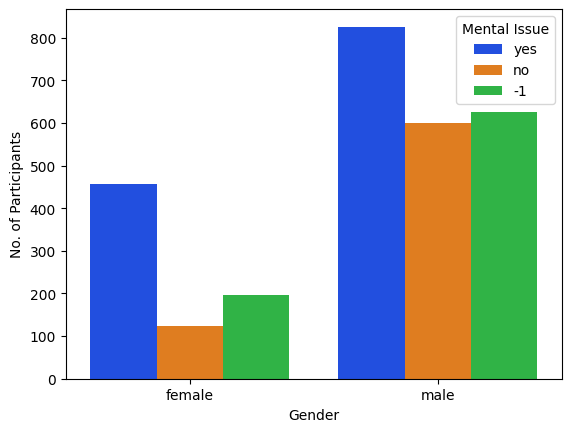

In [8]:
df_Answer['AnswerText'] = df_Answer['AnswerText'].astype(str).apply(lambda x: x.lower())
df_gender_mentalHealth = df_Answer[df_Answer['QuestionID'].isin([2,34])]


df_wide = df_gender_mentalHealth.pivot(index='UserID', columns='QuestionID', values='AnswerText')
print(df_wide[2].nunique())
#The analysis of the gender has shown that there are 87 different genders. In order to simplify 
#the dataframe has been locked for gender that is either male or female.

df_wide = df_wide[(df_wide[2]=='male') | (df_wide[2]=='female')]
sns.set_palette('bright')
ax = sns.countplot(x=2, hue=34, data=df_wide)
ax.set_ylabel("No. of Participants")
ax.set_xlabel("Gender")

ax.legend(title="Mental Issue", loc="upper right");



*The above plot shows that the mental health issue is major in the male gender rather than female.*

**Relation between gender and the willingness to discuss mental health with coworkers or supervisors**

There are four question in the survey (listed below) that could answers this question "different gender's willingness to discuss mental health with coworkers or supervisors.". For our analysis QuestionID 99 and 100 has been choosen.
* Would you have been willing to discuss your mental health with your direct supervisor(s)?	28
* Would you be willing to discuss a mental health issue with your coworkers?	99
* Would you be willing to discuss a mental health issue with your direct supervisor(s)?	100
* Would you have been willing to discuss a mental health issue with your previous co-workers?	110


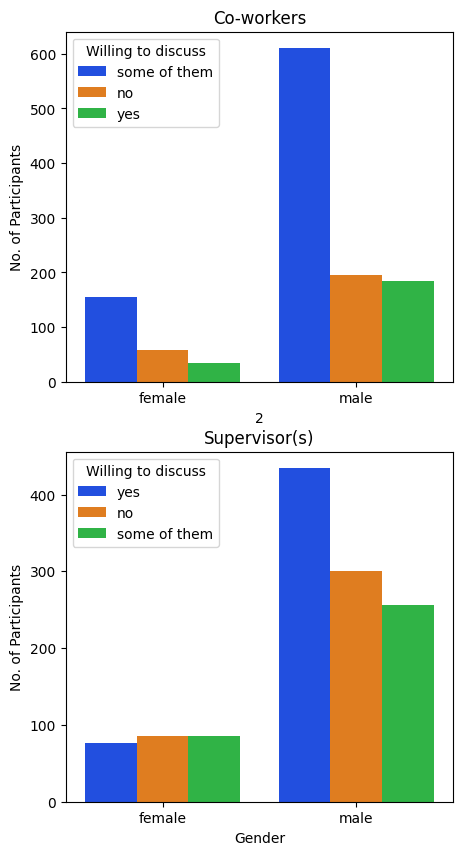

In [9]:
df_gender_willingness = df_Answer[df_Answer['QuestionID'].isin([2,99,100])]


df_wide = df_gender_willingness.pivot(index='UserID', columns='QuestionID', values='AnswerText')

df_wide = df_wide[(df_wide[2]=='male') | (df_wide[2]=='female')]


fig, ax1 = plt.subplots(nrows=2, ncols=1, figsize=(5,10))

sns.countplot(x=2, hue=99, data=df_wide,ax=ax1[0])
ax1[0].set_title('Co-workers')
ax1[0].set_ylabel('No. of Participants')
ax1[0].legend(title="Willing to discuss", loc="upper left");

sns.countplot(x=2, hue=100, data=df_wide,ax=ax1[1])
ax1[1].set_title('Supervisor(s)')
ax1[1].legend(title="Willing to discuss", loc="upper left");
ax1[1].set_xlabel('Gender')
ax1[1].set_ylabel('No. of Participants');


*The above visualization shows that major part of the male gender are willing to discuss about mental health issue with some of their co-workers and their supervisor. The majority of the female gender, however, prefer not to discuss their mental health issue with their supervisor and prefer to talk about it with their co-workers.*

**Perception of negative consequences among different gender**

There are several questions in the survey (listed below) that could answers the perception of negative consequences among different gender. In order to see the different consequences from different sides, I will choose one from the co-worker and one from the employer. I have choosen QuestionID 98 for employer and QuestionID 114 for Co-workers.

*	Do you think that discussing a mental health issue with your employer would have negative consequences?	98
*	Do you think that discussing a mental health disorder with your employer would have negative consequences?	104
*	If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?	106
*	If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?	107
*	Do you think that discussing a mental health disorder with previous employers would have negative consequences?	108
*	Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?	114


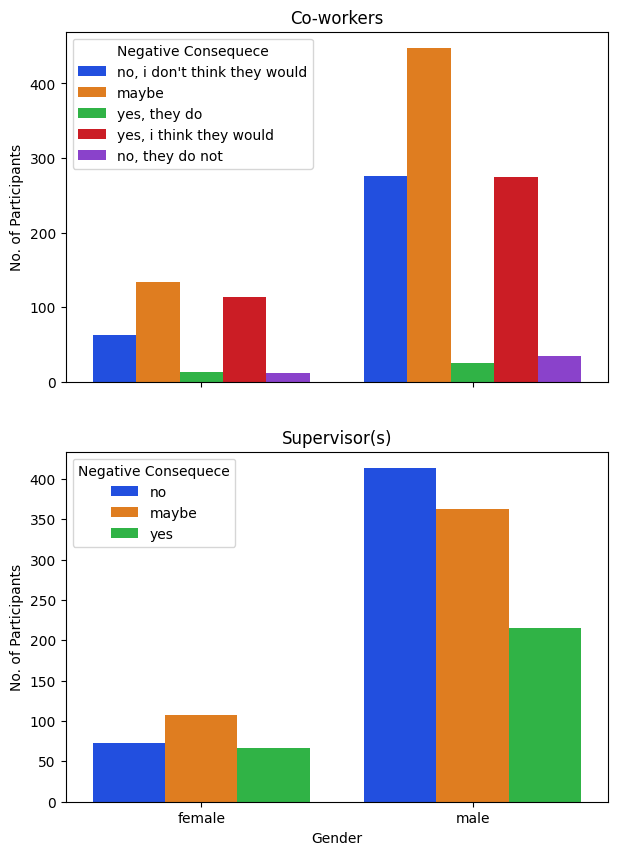

In [10]:
df_gender_willingness = df_Answer[df_Answer['QuestionID'].isin([2,98,114])]


df_wide = df_gender_willingness.pivot(index='UserID', columns='QuestionID', values='AnswerText')

df_wide = df_wide[(df_wide[2]=='male') | (df_wide[2]=='female')]


fig, ax2 = plt.subplots(nrows=2, ncols=1, figsize=(7,10),sharex=True)

sns.countplot(x=2, hue=114, data=df_wide,ax=ax2[0])
ax2[0].set_title('Co-workers')
ax2[0].set_ylabel('No. of Participants')
ax2[0].legend(title="Negative Consequece", loc="upper left")
ax2[0].set_xlabel('')

sns.countplot(x=2, hue=98, data=df_wide,ax=ax2[1])
ax2[1].set_title('Supervisor(s)')
ax2[1].legend(title="Negative Consequece", loc="upper left");
ax2[1].set_xlabel('Gender')
ax2[1].set_ylabel('No. of Participants');

*The survey results indicate that a significant proportion of individuals, regardless of gender, believe that disclosing their mental health issues to team members or co-workers could lead to negative consequences. However, a noteworthy divergence emerges between genders when considering the potential consequences of disclosing mental health issues to employers. The majority of males hold the belief that revealing such concerns to their employers would not result in negative outcomes. On the other hand, the majority of females express concerns that there might be adverse consequences if their employers were made aware of their mental health issues.*

##2. Country and Mental Health

Investigation on the following bullet points can give the explanation on the relationship between countries and mental health if it exists.
*	The prevalence of mental health disorders across different countries.
*	The availability of mental health resources and support across different countries.

**The distribution of the Participants across different countries with Mental Health Issue.**

When it comes to countries, there are two questions that the participants have answered which can be used to investe this. The questions are:
* What country do you live in?	3
* What country do you work in?	50


To ensure the relevance and significance of our findings, we specifically selected countries with a population size exceeding 10 individuals for our analysis.

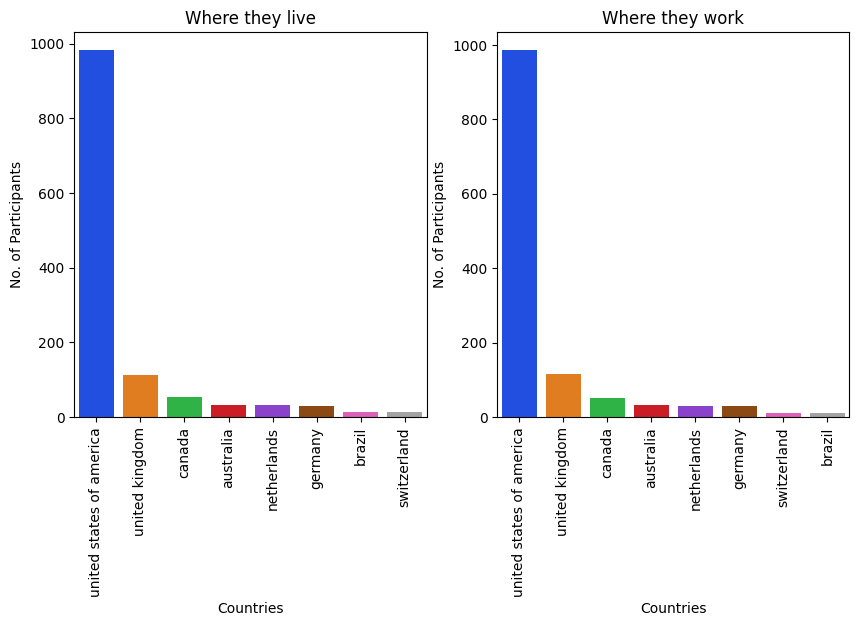

In [11]:
df_Answer['AnswerText'] = df_Answer['AnswerText'].astype(str).apply(lambda x: 
                      "united states of america" if x=='united states' else x)
df_country_mentalHealth = df_Answer[df_Answer['QuestionID'].isin([3,34,50])]


df_wide = df_country_mentalHealth.pivot(index='UserID', columns='QuestionID', values='AnswerText')

country_filtered_data = df_wide[df_wide[34] == 'yes']

counts_1 = country_filtered_data[3].value_counts()
country_filtered_counts_1 = counts_1[counts_1 > 10].sort_values(ascending=False)

counts_2 = country_filtered_data[50].value_counts()
country_filtered_counts_2 = counts_2[counts_2 > 10].sort_values(ascending=False)

fig, ax3 = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
sns.countplot(x=3, data=country_filtered_data, order=country_filtered_counts_1.index, ax=ax3[0])
ax3[0].set_xticklabels(ax3[0].get_xticklabels(), rotation=90)
ax3[0].set_title('Where they live')
ax3[0].set_ylabel("No. of Participants")
ax3[0].set_xlabel("Countries");

sns.countplot(x=50, data=country_filtered_data, order=country_filtered_counts_2.index, ax=ax3[1])
ax3[1].set_xticklabels(ax3[1].get_xticklabels(), rotation=90)
ax3[1].set_title('Where they work')
ax3[1].set_ylabel("No. of Participants")
ax3[1].set_xlabel("Countries");



*Based on the provided plot, it indicates that participants with a higher number of mental health issues reside and work in the United States of America. Moreover, the second and the third countries that are affected are United Kingdom and Canada.*

**Mental health resources across different countries.**

Out of 118 questions, the following subset questions were choosen to assess if the participants had knowledge of any resource when it comes to mental health problem.
* 	Does your employer offer resources to learn more about mental health disorders and options for seeking help?	16
* 	Do you know local or online resources to seek help for a mental health issue?	21
* 	Did your previous employers provide resources to learn more about mental health disorders and how to seek help?	26
* 	Does your employer provide resources to learn more about mental health issues and how to seek help?	96


In order to simplify our investigation, QuestionID 21 has been chosen. Moreover, we specifically selected countries with a population size exceeding 10 individuals for our analysis.

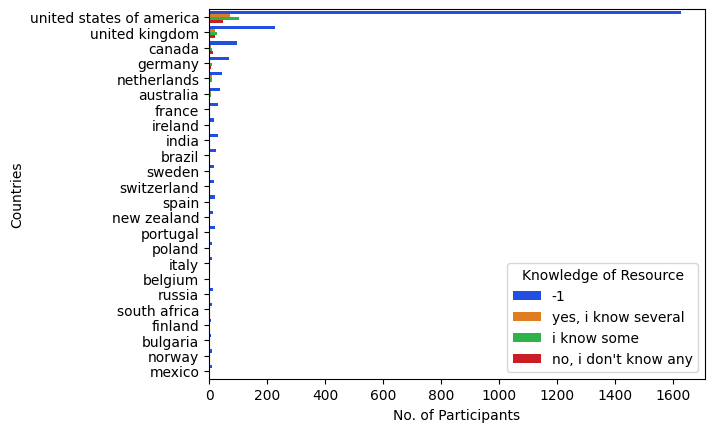

In [12]:
df_resource_country = df_Answer[df_Answer['QuestionID'].isin([3,21])]


df_wide = df_resource_country.pivot(index='UserID', columns='QuestionID', values='AnswerText')

counts_3 = df_wide[3].value_counts()
country_filtered_counts_3 = counts_3[counts_3 > 10].sort_values(ascending=False)


sns.set_palette('bright')
ax4 = sns.countplot(y=3, hue=21, data=df_wide, order=country_filtered_counts_3.index)
ax4.set_xlabel("No. of Participants")
ax4.set_ylabel("Countries")

ax4.legend(title="Knowledge of Resource", loc="lower right");

*The plot reveals that a significant majority of participants from various countries responded with -1, indicating a lack of knowledge regarding available resources for mental health problems. Additionally, a smaller number of participants acknowledged having access to such resources.*

##3.	Company Characteristics and Mental Health

The reaction of different companies can be different and in order to investigate, one can use the following list as starting point

*	Analyze if the size of the organization (number of employees) influences mental health benefits and support provided.
*	Investigate if companies in the tech industry prioritize mental health compared to other industries.


**Does Companies reaction towards mental health affected by number of employees they have?**

In order to answer the above question, the following Questions with their respective QuestionID have been considered.

* 	How many employees does your company or organization have?	8
* 	Is your primary role within your company related to tech/IT?	13
* 	Does your employer offer resources to learn more about mental health disorders and options for seeking help?	16
* 	Did your previous employers provide resources to learn more about mental health disorders and how to seek help?	26
* 	Does your employer provide resources to learn more about mental health issues and how to seek help?	96


In order to simplify, the QuestionID 8 (How many employees does your company or organization have?) and QuestionID 16 (Does your employer offer resources to learn more about mental health disorders and options for seeking help?) have been considred for our analysis. Moreover, the analysis has excluded the responses where participants answered "-1" to the question regarding the number of employees in their company or organization. This response is commonly interpreted as an indication of their unwillingness to disclose or provide an answer. Consequently, this information was deemed unhelpful for the purposes of the findings.

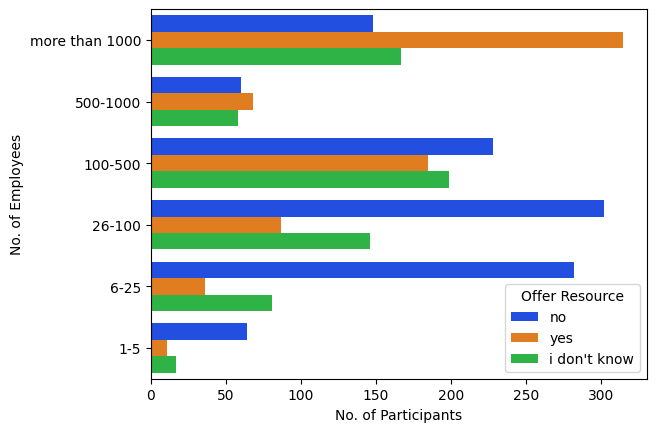

In [13]:
df_company_mental= df_Answer[df_Answer['QuestionID'].isin([8,16])]


df_wide = df_company_mental.pivot(index='UserID', columns='QuestionID', values='AnswerText')

df_wide = df_wide[df_wide[8] != '-1']
counts_4 = df_wide[8].value_counts()
company_mental_filtered_counts_4 = counts_4[counts_4 > 10].sort_values(ascending=False)

count_order = ["more than 1000", "500-1000", "100-500", "26-100", "6-25", "1-5"]  
sns.set_palette('bright')
ax5 = sns.countplot(y=8, hue=16, data=df_wide, order =count_order )
ax5.set_xlabel("No. of Participants")
ax5.set_ylabel("No. of Employees")

ax5.legend(title="Offer Resource", loc="lower right");

*Based on the visualization, it can be observed that companies with more than 500 employees tend to offer resources to combat mental health issues. On the other hand, companies with fewer than 100 employees do not appear to provide such resources.*

*However, for companies with 100 to 500 employees, it is challenging to draw a definitive conclusion regarding whether they offer resources for addressing mental health issues. This uncertainty arises from the fact that the number of employees who answered both "yes" and "I don't know" is nearly equal, indicating a lack of clarity or awareness among respondents in this category.*

**The Tech Industry's Emphasis on Mental Health Compared to Other Industries**

Additional QuestionID 9: Is your current employer primarily a tech company/organization? 

This question aims to identify whether the participants' current employers belong to the tech industry or if they are associated with other sectors. By including this question, the investigation can gather data specifically from individuals working in the tech industry and compare their responses regarding the prioritization of mental health to those from participants employed in other industries. This will help provide insights into whether the tech industry exhibits a distinct focus on mental health compared to companies in different sectors.

The same as before, the analysis has excluded the responses where participants answered "-1" to the question if their company is a tech or not which is unwillingness to disclose or provide an answer.


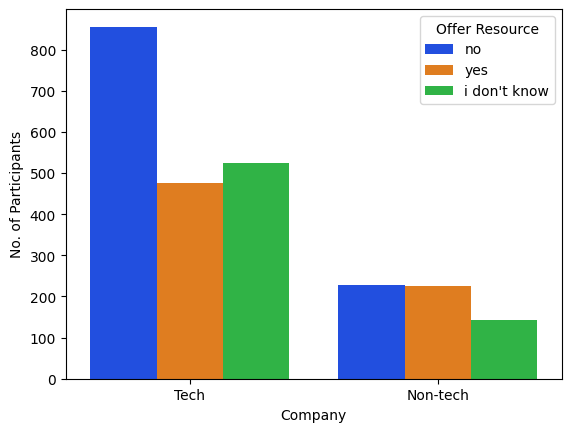

In [14]:
df_tech_notTech_mental= df_Answer[df_Answer['QuestionID'].isin([9,16])]


df_wide = df_tech_notTech_mental.pivot(index='UserID', columns='QuestionID', values='AnswerText')
df_wide = df_wide[df_wide[9] != '-1']
counts_5 = df_wide[9].value_counts()


ax6 = sns.countplot(x=9, hue=16, data=df_wide)
ax6.set_ylabel("No. of Participants")
ax6.set_xlabel("Company")
ax6.set_xticklabels(["Tech", "Non-tech"])
ax6.legend(title="Offer Resource", loc="upper right");

*The investigation revealed that a significant number of participants from tech companies responded negatively when asked if their employers provided any resources to address mental health issues. In contrast, for participants from non-tech companies, an equal number responded affirmatively and negatively regarding the provision of support for mental health concerns.*

*These findings suggest that there may be a disparity between tech and non-tech companies in terms of prioritizing and providing resources for mental health. Tech companies appear to have a lower prevalence of offering such resources compared to their counterparts in other industries.*

##4.	Treatment and Support

In this investigation on Treatment and Support, we will delve into various aspects of seeking treatment for mental health disorders and the role of support systems. Specifically, we will examine 

*	the relationship between seeking treatment for mental health disorders and the presence of a family history of mental illness.
*	the availability of mental health resources and support in the workplace affects willingness to discuss mental health issues.

By conducting these analyses, we aim to gain insights into the factors that shape treatment-seeking behaviors and the role of different support mechanisms in promoting mental well-being.

**Relationship between seeking treatment and family history of mental illness**

Those two question below are important to answer the substitle:

* Would you be willing to discuss a mental health issue with your direct supervisor(s)?	100

* Do you have a family history of mental illness?	6


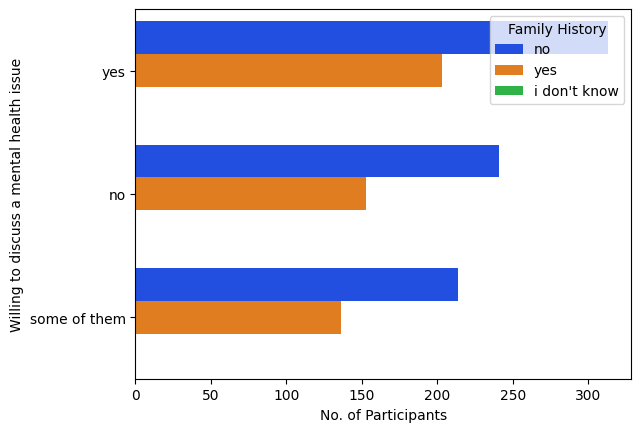

In [15]:
df_seekingHelp_familyHistory= df_Answer[df_Answer['QuestionID'].isin([6,100])]


df_wide = df_seekingHelp_familyHistory.pivot(index='UserID', columns='QuestionID', values='AnswerText')
counts_6 = df_wide[100].value_counts()


ax7 = sns.countplot(y=100, hue=6, data=df_wide)
ax7.set_xlabel("No. of Participants")
ax7.set_ylabel("Willing to discuss a mental health issue")

ax7.legend(title="Family History", loc="upper right");

*The previous findings did not indicate a clear relationship between having a family history of mental illness and the willingness of participants to discuss their mental health issues with their supervisors.*

**Does availabily of resource opens the willingness to discuss with employers or co-workers?**

In this investigation, we will examine the relationship between the availability of mental health resources in the workplace and the willingness of participants to discuss mental health issues with their coworkers and direct supervisors. Specifically, we will analyze the responses to questions 99, 100, and 96 to understand if the presence of resources for learning about mental health issues and seeking help influences individuals' openness to discussing their mental health concerns with their colleagues and supervisors. By exploring this connection, we aim to gain insights into the impact of resources on fostering a supportive environment for mental health discussions in the workplace. The questions and their QuestionID from the survey are listed below:

* Would you be willing to discuss a mental health issue with your coworkers? (99)
* Would you be willing to discuss a mental health issue with your direct supervisor(s)? (100)
* Does your employer provide resources to learn more about mental health issues and how to seek help? 96

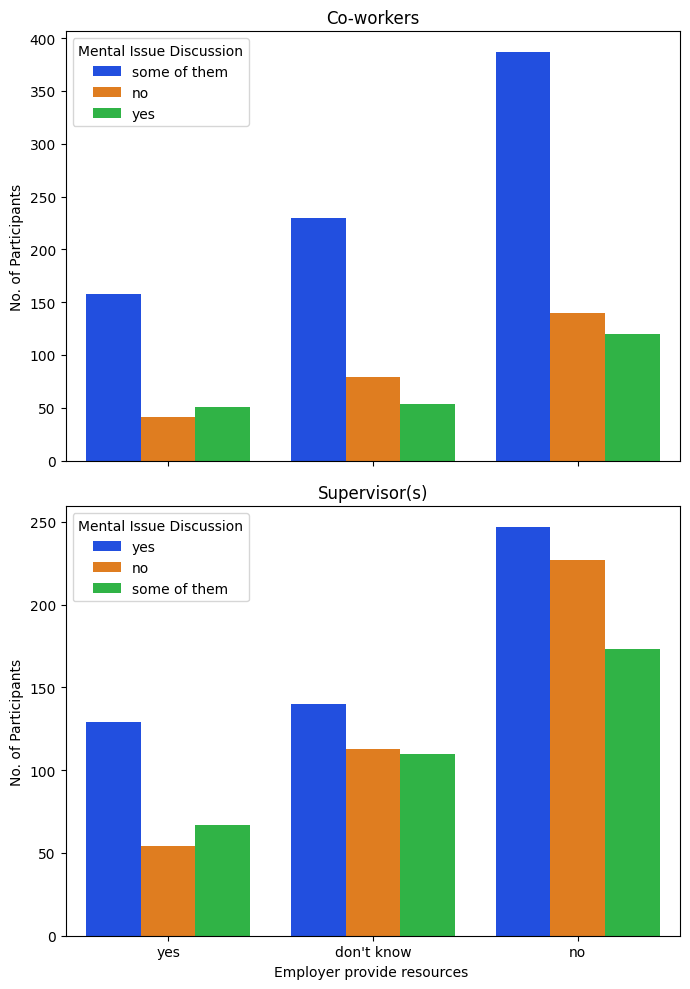

In [16]:
df_resource_employer_coworkers = df_Answer[df_Answer['QuestionID'].isin([96,99,100])]

df_wide = df_resource_employer_coworkers.pivot(index='UserID', columns='QuestionID', values='AnswerText')

fig, ax8 = plt.subplots(nrows=2, ncols=1, figsize=(7,10), sharex=True)

sns.countplot(x=96, hue=99, data=df_wide,ax=ax8[0])
ax8[0].set_title('Co-workers')
ax8[0].set_ylabel('No. of Participants')
ax8[0].legend(title="Mental Issue Discussion", loc="upper left")
ax8[0].set_xlabel('')

sns.countplot(x=96, hue=100, data=df_wide,ax=ax8[1])
ax8[1].set_title('Supervisor(s)')
ax8[1].legend(title="Mental Issue Discussion", loc="upper left");
ax8[1].set_xlabel('Employer provide resources ')
ax8[1].set_ylabel('No. of Participants')
plt.tight_layout();

*According to the plotted data, employees are generally more willing to discuss their mental health issues with their supervisors, regardless of whether their employer provides resources to combat mental health issues or not. However, when it comes to discussing mental health issues with their co-workers, employees tend to be more selective and may only feel comfortable sharing with a subset of their colleagues.*

##5.	Remote Work and Mental Health

In this section, we will explore the relationship between remote work arrangements and mental health, specifically focusing on how remote work influences the perception of mental health issues and the likelihood of seeking support. Additionally, we will investigate whether remote workers are more or less likely to discuss their mental health compared to employees in office-based work environments. By examining these factors, we aim to gain insights into the impact of remote work on mental health and support-seeking behaviors.

Bullet points:
* Analyze if remote work arrangements influence the perception of mental health issues.
* Investigate if remote workers are more or less likely to discuss mental health compared to office-based workers.

The QuestionID that we need to include in this investigation are 
* Do you work remotely?	118
* Have you ever been diagnosed with a mental health disorder? 34
* Would you be willing to discuss a mental health issue with your coworkers? (99)
* Would you be willing to discuss a mental health issue with your direct supervisor(s)? (100)

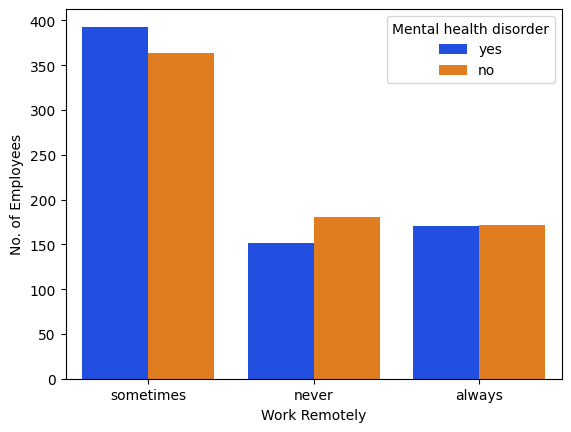

In [17]:
df_remote_mental= df_Answer[df_Answer['QuestionID'].isin([34,118])]


df_wide = df_remote_mental.pivot(index='UserID', columns='QuestionID', values='AnswerText')
df_wide = df_wide[df_wide[34] != '-1']
ax9 = sns.countplot(x=118, hue=34, data=df_wide)
ax9.set_xlabel("Work Remotely")
ax9.set_ylabel("No. of Employees")

ax9.legend(title="Mental health disorder", loc="upper right");

*The prevalence of mental health issues appears to be higher among employees who work remotely on a part-time basis, rather than those who work fully remotely.*

In [18]:
df_remote_willing = df_Answer[df_Answer['QuestionID'].isin([99,100,118])]


df_wide = df_remote_willing.pivot(index='UserID', columns='QuestionID', values='AnswerText')
df_remote_wo_nan = df_wide.dropna(subset=118)
df_remote_wo_nan.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 1261 to 2693
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   99      0 non-null      object
 1   100     0 non-null      object
 2   118     1433 non-null   object
dtypes: object(3)
memory usage: 44.8+ KB


*Based on the provided analysis, it appears that employees who have worked remotely did not provide responses regarding their willingness to discuss their mental health issues with either their co-workers or their direct supervisors.*

##6. Age

Before we explore the different relationships that age have with various aspects of mental health, work environment, and personal experiences, let's explore the distribution of the ages of the employees.

Average of the employees is 33.91536273115221


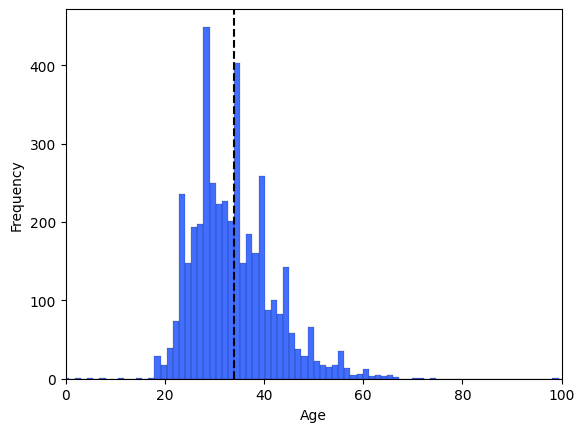

In [19]:
df_age= df_Answer[df_Answer['QuestionID'].isin([1])]

df_wide = df_age.pivot(index='UserID', columns='QuestionID', values='AnswerText')
df_wide[1] = df_wide[1].astype(int)
print(f'Average of the employees is {df_wide[1].mean()}')
ax12 = sns.histplot(x=1,data=df_wide)
ax12.set_xlabel('Age')
ax12.set_ylabel('Frequency')
ax12.axvline(df_wide[1].mean(), color='black', linestyle='--')



plt.xlim(0, 100);

*The above plot resembles a right skewed graph which indicates that the majority of the participants are on the left side of the mean value(34 years).*

###6.1 Age and Mental Health

Understanding the interplay between age and mental health is crucial in addressing the unique needs and challenges faced by different age groups. By examining the impact of age on seeking treatment, perceptions of mental health benefits, and work-related implications, we can develop targeted strategies to promote mental well-being across the lifespan.

To explore the aforementioned idea, we can delve into the following two questions.

* Analyze the relationship between age and seeking treatment for mental health disorders from mental health professionals.
* Investigate if age influences the perception of mental health benefits provided by employers.


The survey questions that are connected to the above idea are:
* Have you ever sought treatment for a mental health disorder from a mental health professional? 7
* Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?	27



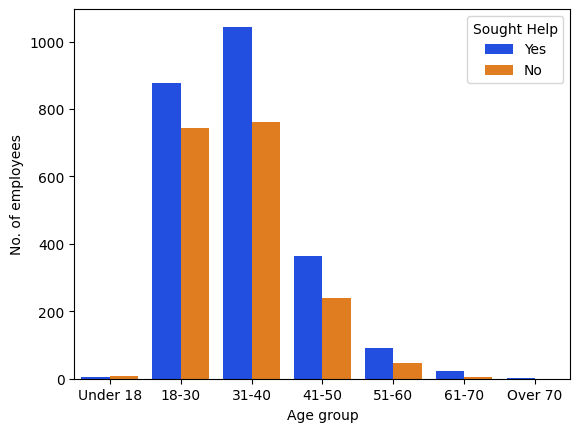

In [20]:
df_age_mentalHealth = df_Answer[df_Answer['QuestionID'].isin([1, 7,27])]

df_wide = df_age_mentalHealth.pivot(index='UserID', columns='QuestionID', values='AnswerText')
df_wide[1] = df_wide[1].astype(int)
legend_labels = {'1': 'Yes', '0': 'No'}
df_wide[7] = df_wide[7].map(legend_labels)

age_labels = ['Under 18', '18-30', '31-40', '41-50', '51-60', '61-70', 'Over 70']
age_ranges = [0, 18, 30, 40, 50, 60, 70, 120]

df_wide['age_group'] = pd.cut(df_wide[1], bins=age_ranges, labels=age_labels)

ax13=sns.countplot(x='age_group', hue=7,data=df_wide)
ax13.set_xlabel("Age group")
ax13.set_ylabel('No. of employees')
ax13.legend(title="Sought Help", loc="upper right");

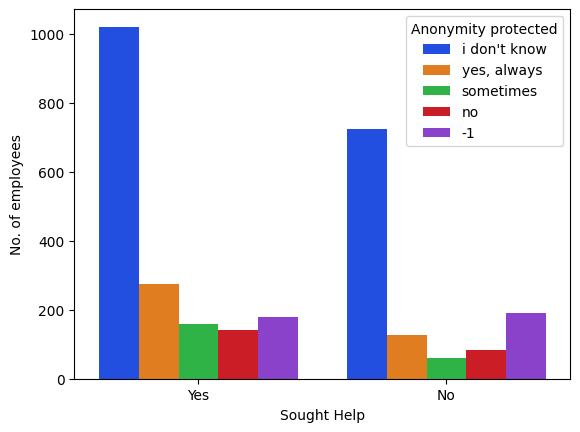

In [21]:
ax14=sns.countplot(x=7, hue=27,data=df_wide)
ax14.set_xlabel("Sought Help")
ax14.set_ylabel('No. of employees')
ax14.legend(title="Anonymity protected", loc="upper right");

*Based on the analysis of the two plots presented above, it is clear that a significant portion of employees across different age groups have actively sought assistance for their mental health concerns. Additionally, it can be observed that a considerable number of employees who reached out for help had their anonymity safeguarded.* 

###6.2 Age and Work Environment

Age is a significant factor that can shape an individual's experiences and perspectives in the work environment. Examining the specific impact of age on the comfort level of discussing mental health, the ease of requesting medical leave, and the perception of negative consequences provides valuable insights into the unique challenges and needs faced by different age groups in navigating mental health issues at work.

The following questions from the survey have been taken to investigate the above idea:
*	Would you feel comfortable discussing a mental health issue with your coworkers?	18
*	Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?	19
*	How easy is it for you to take medical leave for a mental health condition?	97
*	Do you think that discussing a mental health issue with your employer would have negative consequences?	98


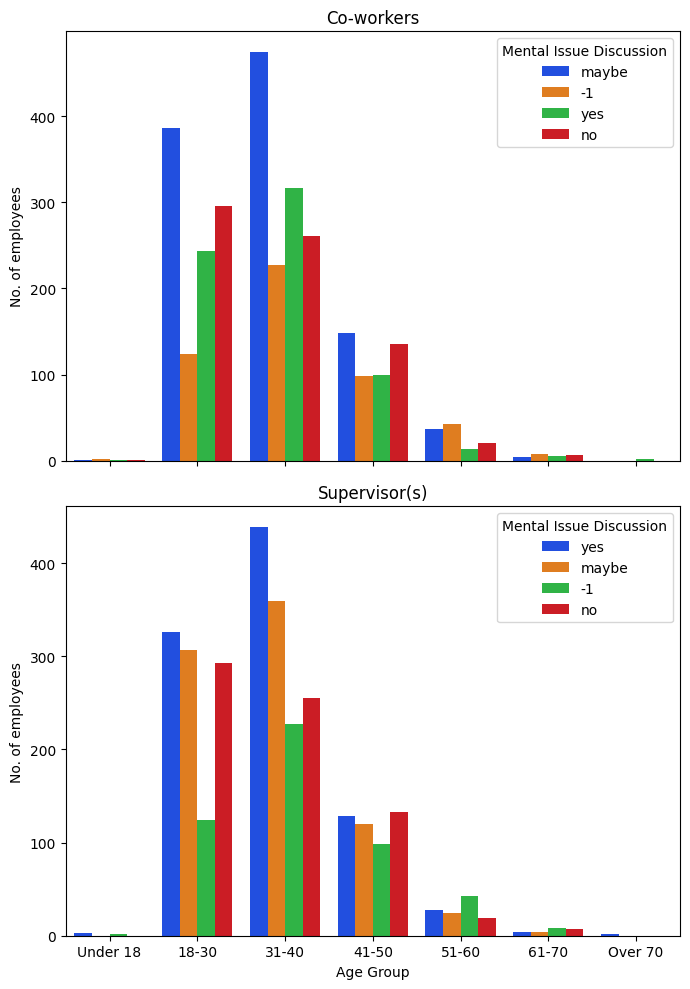

In [22]:
df_age_mentalHealth = df_Answer[df_Answer['QuestionID'].isin([1, 18,19,97,98])]

df_wide = df_age_mentalHealth.pivot(index='UserID', columns='QuestionID', values='AnswerText')
df_wide[1] = df_wide[1].astype(int)

age_labels = ['Under 18', '18-30', '31-40', '41-50', '51-60', '61-70', 'Over 70']
age_ranges = [0, 18, 30, 40, 50, 60, 70, 120]

df_wide['age_group'] = pd.cut(df_wide[1], bins=age_ranges, labels=age_labels)

fig, ax15 = plt.subplots(nrows=2, ncols=1, figsize=(7,10), sharex=True)
sns.countplot(x='age_group', hue=18, data=df_wide,ax=ax15[0])
ax15[0].set_title('Co-workers')
ax15[0].set_ylabel('No. of employees')
ax15[0].legend(title="Mental Issue Discussion", loc="upper right")
ax15[0].set_xlabel('')

sns.countplot(x='age_group', hue=19, data=df_wide,ax=ax15[1])
ax15[1].set_title('Supervisor(s)')
ax15[1].legend(title="Mental Issue Discussion", loc="upper right");
ax15[1].set_xlabel('Age Group')
ax15[1].set_ylabel('No. of employees')
plt.tight_layout();

*The two subplots depicted above reveal that a significant proportion of individuals within the age group have a preference for discussing their mental health concerns with their supervisors. Conversely, when it comes to sharing these concerns with their co-workers, the majority tend to be selective and choose not to discuss them with just anyone.*

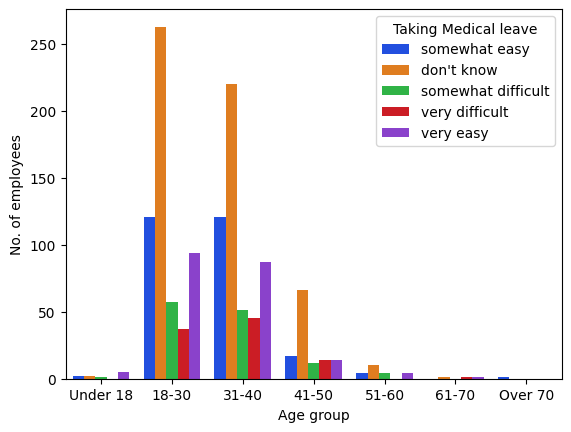

In [23]:
ax16=sns.countplot(x='age_group', hue=97,data=df_wide)
ax16.set_xlabel("Age group")
ax16.set_ylabel('No. of employees')
ax16.legend(title="Taking Medical leave", loc="upper right");

*The majority of the age-groups don't know the level of difficult one have to face if they are planning to take Medical leave due to mental health issue.*

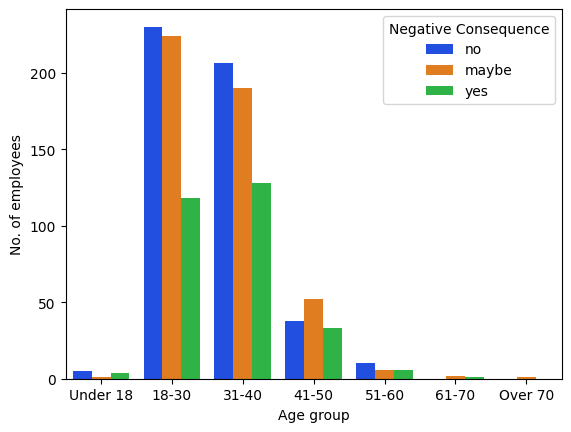

In [24]:
ax17=sns.countplot(x='age_group', hue=98,data=df_wide)
ax17.set_xlabel("Age group")
ax17.set_ylabel('No. of employees')
ax17.legend(title="Negative Consequence", loc="upper right");

*Based on the presented data, it is evident that a significant portion of individuals across various age groups feel that discussing mental health issues with their employer would not result in negative consequences.*

###6.3 Age and Personal Experiences


Age plays a crucial role in shaping an individual's personal experiences with mental health and their impact on work. By exploring the age distribution of individuals who have had mental health disorders and analyzing how age influences the frequency and impact of these disorders in the workplace, we can gain valuable insights into the unique challenges faced by different age groups. Therefore, this means we need to 

* Analyze the age distribution of individuals who have had mental health disorders in the past or currently.
* Examine how age affects the frequency and impact of feeling that a mental health disorder interferes with work.

The following question texts and their corresponding question IDs can be used to assess the relationship between age and personal experiences with mental health:

1. "Have you had a mental health disorder in the past?" (QuestionID: 32)
2. "Do you currently have a mental health disorder?" (QuestionID: 33)
3. "If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?" (QuestionID: 48)
4. "If you have a mental health disorder, how often do you feel that it interferes with your work when not being treated effectively (i.e., when you are experiencing symptoms)?" (QuestionID: 49)

Analyzing the responses to these questions can provide valuable insights into how age influences the prevalence of mental health disorders and their impact on work performance.

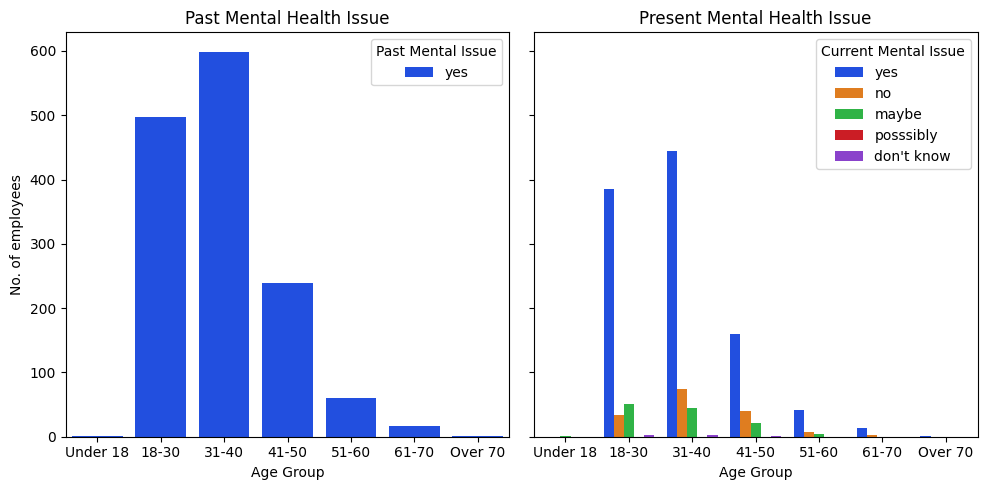

In [25]:
df_age_personalExperience = df_Answer[df_Answer['QuestionID'].isin([1, 32, 33, 48, 49])]

df_wide = df_age_personalExperience.pivot(index='UserID', columns='QuestionID', values='AnswerText')
df_wide[1] = df_wide[1].astype(int)

age_labels = ['Under 18', '18-30', '31-40', '41-50', '51-60', '61-70', 'Over 70']
age_ranges = [0, 18, 30, 40, 50, 60, 70, 120]

df_wide['age_group'] = pd.cut(df_wide[1], bins=age_ranges, labels=age_labels)

fig, ax18 = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
sns.countplot(x='age_group', hue=32, data=df_wide[df_wide[32] == "yes"],ax=ax18[0])
ax18[0].set_title('Past Mental Health Issue')
ax18[0].set_ylabel('No. of employees')
ax18[0].legend(title="Past Mental Issue", loc="upper right")
ax18[0].set_xlabel('Age Group')

sns.countplot(x='age_group', hue=33, data=df_wide[df_wide[32] == "yes"],ax=ax18[1], hue_order = ['yes', 'no', 'maybe', 'posssibly', "don't know"])
ax18[1].set_title('Present Mental Health Issue')
ax18[1].legend(title="Current Mental Issue", loc="upper right");
ax18[1].set_xlabel('Age Group')
ax18[1].set_ylabel('')
plt.tight_layout();

*The plots above provide a comparison between past and current experiences of employees across different age groups regarding mental health issues. The findings indicate that a significant majority of employees who have had past experiences with mental health issues are currently experiencing such issues.*

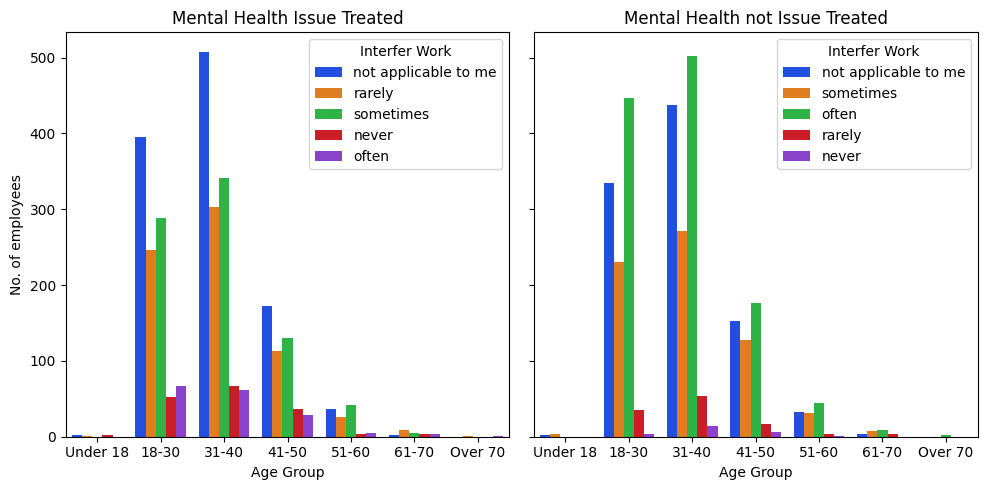

In [26]:
fig, ax19 = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True)
sns.countplot(x='age_group', hue=48, data=df_wide,ax=ax19[0])
ax19[0].set_title('Mental Health Issue Treated')
ax19[0].set_ylabel('No. of employees')
ax19[0].legend(title="Interfer Work", loc="upper right")
ax19[0].set_xlabel('Age Group')

sns.countplot(x='age_group', hue=49, data=df_wide,ax=ax19[1])
ax19[1].set_title('Mental Health not Issue Treated')
ax19[1].legend(title="Interfer Work", loc="upper right");
ax19[1].set_xlabel('Age Group')
ax19[1].set_ylabel('')
plt.tight_layout();

*The above visualization gives us insight that majority of the employees who have combatted the mental health issue would work normally without being interfered with issue. However, when the employees neglect or didn't treat their mental issue would not be effective at work.*

##7. Trend of Mental Health: Increase or Decrease

To assess the progression of mental health issues over different years, we can focus on a key aspect of the survey: Question ID 33, which explores individuals' current mental health status. By analyzing this question's responses for each year between 2016 and 2019, we can identify any trends or patterns that indicate whether the prevalence of mental health issues is increasing or decreasing over time. 

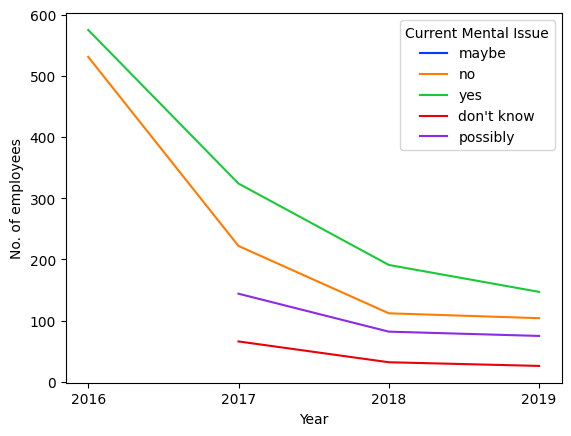

In [44]:
df_mentalhealth_year = df_Answer[df_Answer['QuestionID'].isin([33])]

df_wide = df_mentalhealth_year.pivot(index=['UserID','SurveyID'], columns='QuestionID', values='AnswerText')

mental_health_year = df_wide.reset_index().groupby(['SurveyID',33]).size().reset_index()

ax20=sns.lineplot(x='SurveyID', y=0, hue= 33, data=mental_health_year )

ax20.set_xlabel("Year")
ax20.set_ylabel('No. of employees')
ax20.legend(title="Current Mental Issue", loc="upper right")
plt.xticks(range(2016, 2020, 1));

*The analysis of Question ID 33 responses reveals a decrease in the number of times the survey question was asked each year. However, it is important to note that this decrease in survey question frequency does not provide clear evidence of an increase or decrease in mental health issues. To assess changes in mental health patterns over different years, it would be necessary to observe an increase or decrease in the specific responses ("yes" or "no") from employees. Without such changes in responses, it is difficult to draw conclusions about the trends in mental health issues based solely on the decrease in survey question frequency.*

#Conclusion

Ultimately, scrutiny of the submitted information illuminates various critical facets pertaining to age and psychological well-being within the occupational milieu. Despite males appearing externally more open in discussing mental health issues with coworkers and bosses compared to females, this observation highlights the differences in the degrees of ease between the sexes. Additionally, age appears to influence the perception of negative consequences when discussing mental health issues with employers, with variations observed among different age groups.

The analysis illuminates the pervasiveness of psychological afflictions within the populace of America, succeeded in severity solely by inhabitants of Great Britain and the arctic nation of the leaf. It also indicates a lack of knowledge regarding available mental health resources among participants from various countries. Although the extent to which companies offer mental health resources appears influenced by their size, with larger firms more prone to provide such benefits.

The findings suggest a potential disparity between tech and non-tech companies in prioritizing mental health resources, with tech companies showing lower prevalence in providing support. The influence of family history of mental illness on the willingness to discuss mental health with supervisors appears inconclusive based on the available data.

According to recent empirical observations of workgroups, it seems that in general, employees appear considerably more amenable to initiate open discourse surrounding topics of mental health and wellbeing with direct supervisors as opposed to mere coworkers. The complex multivariate analyses of the aggregated data infer there could potentially exist an intricate interdependence between the rising phenomenon of individuals operating professionally outside of traditional office environments and an elevated frequency of individuals grappling with psychological afflictions.

Regarding age distribution, the data shows a right-skewed graph with the majority of participants being on the younger side. The analysis also indicates that employees across different age groups actively seek assistance for mental health concerns, and the protection of anonymity plays a significant role in encouraging help-seeking behaviors.

Although this analysis yields crucial information, exploring the intricate connection between age and psychological welfare in occupational settings would require supplemental examination and scrutiny.

#Further Research

The conclusion of the analysis highlights several critical aspects related to age and psychological well-being in the workplace. However, further research is needed to gain a deeper understanding of these phenomena.

Firstly, exploring the differences in the degrees of ease between genders in discussing mental health issues with coworkers and supervisors is crucial. Additional investigation can shed light on the underlying factors contributing to these disparities and help develop strategies to promote open and supportive communication for all employees.

Moreover, more comprehensive studies are necessary to examine the influence of age on the perception of negative consequences when discussing mental health issues with employers. Understanding the specific factors that contribute to these variations among different age groups can provide valuable insights for creating inclusive and supportive work environments.

Additionally, the analysis indicates a potential disparity between tech and non-tech companies in prioritizing mental health resources. Further research is needed to explore the reasons behind this discrepancy and to identify effective interventions that can bridge the gap and ensure adequate support for employees across all industries.

Furthermore, investigating the interdependence between remote work arrangements and the frequency of psychological afflictions is essential. This emerging trend requires careful examination to determine the specific challenges and opportunities it poses for mental well-being in the workplace.

Lastly, studying the protective role of anonymity in encouraging help-seeking behaviors among employees of different age groups can provide valuable insights for designing mental health programs and support systems.

In conclusion, while the analysis provides valuable information, further research is necessary to explore the intricate connection between age and psychological well-being in occupational settings. These research areas can contribute to the development of evidence-based interventions and policies aimed at fostering a healthier and more supportive work environment for employees of all ages.